In [208]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [209]:
df=pd.read_csv('D:/MKCE-20220504T065310Z-001/0.MKCE/Datasets/Social_Network_Ads.csv')
print(df.head())

    User ID  Gender   Age  EstimatedSalary  Purchased
0  15624510    Male  19.0          19000.0          0
1  15810944    Male  35.0          20000.0          0
2  15668575  Female  26.0          43000.0          0
3  15603246  Female  27.0          57000.0          0
4  15804002    Male  19.0          76000.0          0


In [210]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,Male,19.0,76000.0,0
...,...,...,...,...,...
395,15691863,Female,46.0,41000.0,1
396,15706071,Male,51.0,23000.0,1
397,15654296,Female,50.0,20000.0,1
398,15755018,Male,36.0,33000.0,0


In [211]:
df.shape

(400, 5)

In [212]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   User ID          400 non-null    int64  
 1   Gender           400 non-null    object 
 2   Age              400 non-null    float64
 3   EstimatedSalary  400 non-null    float64
 4   Purchased        400 non-null    int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 15.8+ KB


In [213]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [214]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [215]:
df.corr()

,User ID,Age,EstimatedSalary,Purchased
User ID,1.000000,-0.000721,0.071097,0.007120
Age,-0.000721,1.000000,0.155238,0.622454
EstimatedSalary,0.071097,0.155238,1.000000,0.362083
Purchased,0.007120,0.622454,0.362083,1.000000


In [216]:
df.cov()

,User ID,Age,EstimatedSalary,Purchased
User ID,5.134915e+09,-541.682870,1.737143e+08,244.836284
Age,-5.416829e+02,109.890702,5.548738e+04,3.131165
EstimatedSalary,1.737143e+08,55487.380952,1.162603e+09,5924.367168
Purchased,2.448363e+02,3.131165,5.924367e+03,0.230269


<AxesSubplot:>

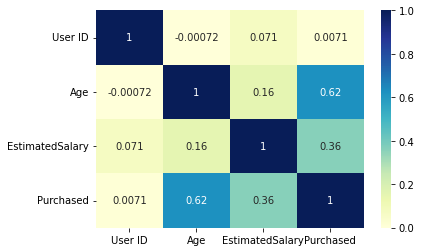

In [217]:
sns.heatmap(df.corr(),cmap="YlGnBu",annot=True)

<AxesSubplot:>

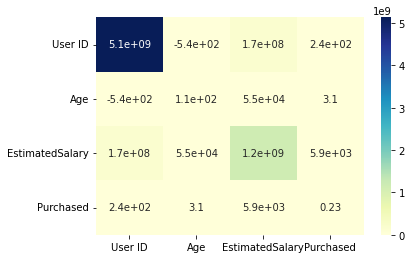

In [218]:
sns.heatmap(df.cov(),cmap="YlGnBu",annot=True)

In [219]:
df2=pd.get_dummies(df)

In [220]:
df2

,User ID,Age,EstimatedSalary,Purchased,Gender_Female,Gender_Male
0,15624510,19.0,19000.0,0,0,1
1,15810944,35.0,20000.0,0,0,1
2,15668575,26.0,43000.0,0,1,0
3,15603246,27.0,57000.0,0,1,0
4,15804002,19.0,76000.0,0,0,1
...,...,...,...,...,...,...
395,15691863,46.0,41000.0,1,1,0
396,15706071,51.0,23000.0,1,0,1
397,15654296,50.0,20000.0,1,1,0
398,15755018,36.0,33000.0,0,0,1


In [221]:
df2.shape

(400, 6)

In [222]:
df2.columns

Index(['User ID', 'Age', 'EstimatedSalary', 'Purchased', 'Gender_Female',
       'Gender_Male'],
      dtype='object')

In [223]:
Y=df2['Purchased']

X=df2[['User ID', 'Age', 'EstimatedSalary', 'Gender_Female',
       'Gender_Male']]

In [224]:
X

,User ID,Age,EstimatedSalary,Gender_Female,Gender_Male
0,15624510,19.0,19000.0,0,1
1,15810944,35.0,20000.0,0,1
2,15668575,26.0,43000.0,1,0
3,15603246,27.0,57000.0,1,0
4,15804002,19.0,76000.0,0,1
...,...,...,...,...,...
395,15691863,46.0,41000.0,1,0
396,15706071,51.0,23000.0,0,1
397,15654296,50.0,20000.0,1,0
398,15755018,36.0,33000.0,0,1


In [225]:
Y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

In [226]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [227]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(320, 5)
(80, 5)
(320,)
(80,)


In [228]:
from sklearn.tree import DecisionTreeClassifier
mod=DecisionTreeClassifier()

In [229]:
mod.fit(X_train,Y_train)

DecisionTreeClassifier()

In [230]:
Y_pred=mod.predict(X_test)

In [231]:
mod.predict_proba(X_test)

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.

In [232]:
#to measure Accuracy
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [233]:
print(accuracy_score(Y_test,Y_pred))

0.8875


In [234]:
print(Y_test)

132    0
309    0
341    0
196    0
246    0
      ..
14     0
363    0
304    0
361    1
329    1
Name: Purchased, Length: 80, dtype: int64


In [235]:
print(confusion_matrix(Y_test,Y_pred))

[[55  3]
 [ 6 16]]


In [236]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.90      0.95      0.92        58
           1       0.84      0.73      0.78        22

    accuracy                           0.89        80
   macro avg       0.87      0.84      0.85        80
weighted avg       0.89      0.89      0.88        80

